In [1]:
import joblib
import numpy as np

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

In [3]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

In [4]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9966120835686054
P-value: 3.544883639270067e-23


In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.8492519577215736e-05


In [7]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9966120835686054
P-value: 3.544883639270067e-23


In [8]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.8494912653646347e-05


In [9]:
weights_unenc_ckks

[0.044507600409394346,
 0.1590175004855811,
 -0.015924298724993197,
 0.15657210118958423,
 -0.07234690085783362,
 0.05013119980461728,
 -0.020378999902218142,
 0.047594702285274,
 0.29981270008752137,
 0.1267214017949202,
 0.21083450039190516,
 0.2299724002440637,
 0.1288306994792165,
 0.07516329984356787,
 0.12483770266701207,
 0.0833752007282955,
 0.11009810020060629,
 -0.025569699850566188,
 -0.04121959960885663,
 -0.17852700057178533,
 -0.23871019714729982,
 -0.05296530128416421]

In [10]:
weights_unenc_sklearn

array([ 0.04995044,  0.15291807, -0.00295392,  0.15394732, -0.07282189,
        0.05424558, -0.01450725,  0.05434416,  0.29936445,  0.13346502,
        0.21293832,  0.23535906,  0.12911772,  0.08360015,  0.12720956,
        0.08643816,  0.11201657, -0.02139222, -0.03285467, -0.17723344,
       -0.23834938, -0.05838784])

In [11]:
weights_unenc_paillier

[0.04450641718275702,
 0.1590181847165826,
 -0.015926437143117454,
 0.15657136369099545,
 -0.07234589350127761,
 0.05013104790009136,
 -0.020378572836437195,
 0.047593650674234246,
 0.2998125963334406,
 0.12671855962513115,
 0.2108352505159219,
 0.22997339602310782,
 0.12882956941514473,
 0.0751652964931692,
 0.12483753120975018,
 0.08337418816839894,
 0.11009919981847624,
 -0.02556923414399796,
 -0.04121836977114382,
 -0.17852735945200704,
 -0.23870972523207828,
 -0.052965469898752685]

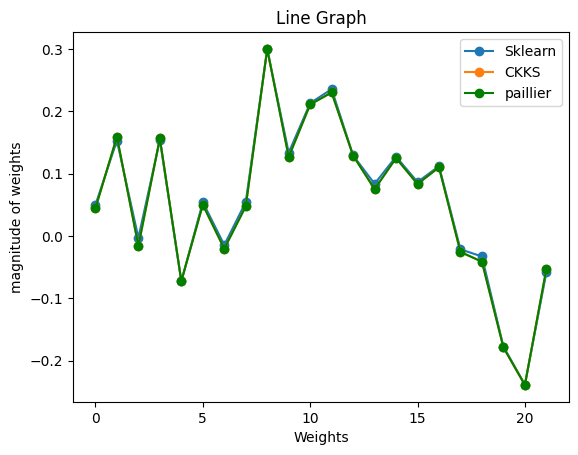

In [12]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='o')  
plt.plot(weights_unenc_paillier, label='paillier', marker='o', color='green')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

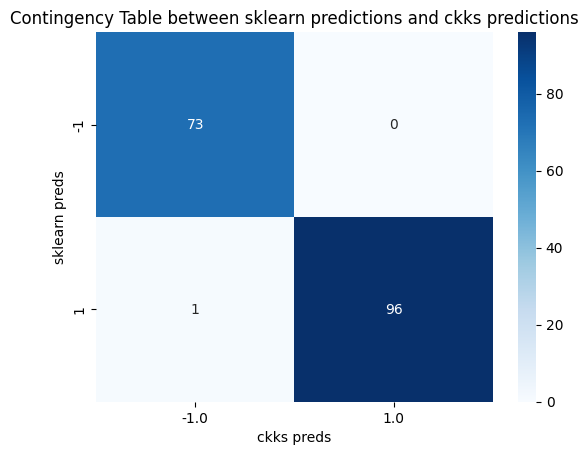

In [13]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

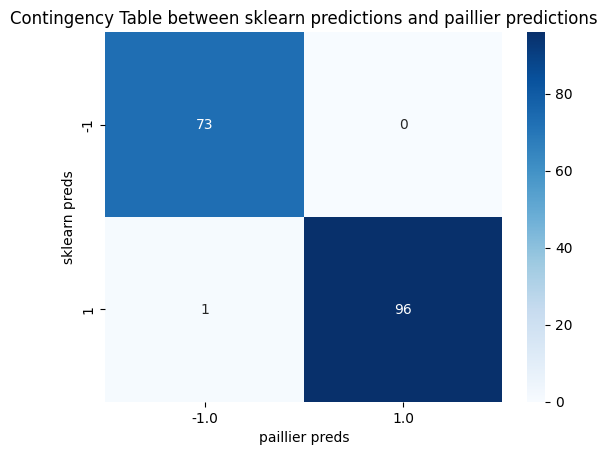

In [14]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

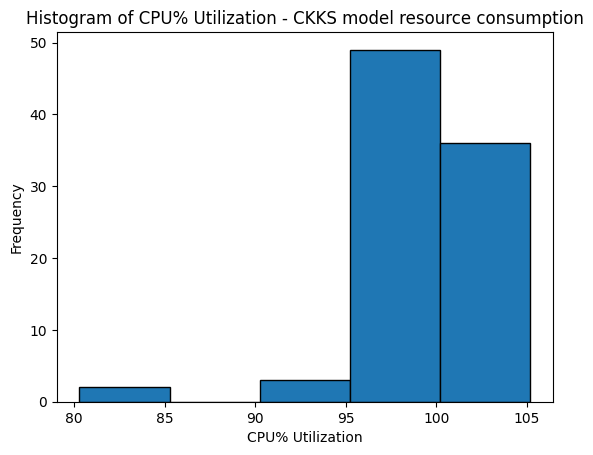

In [15]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [16]:
print(np.mean(filtered_ckks_cpu_util))
print(np.median(filtered_ckks_cpu_util))

99.25999999999998
99.75


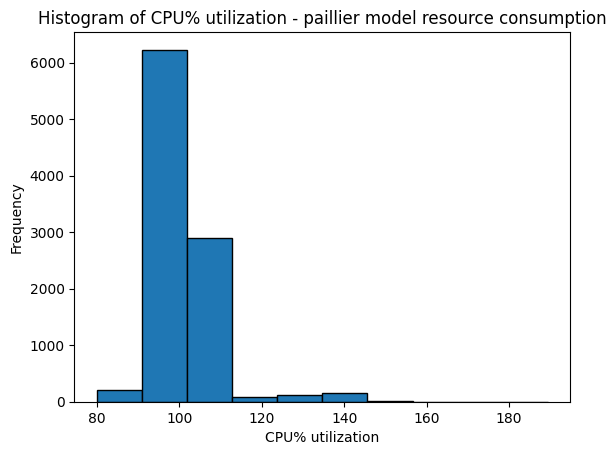

In [17]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [18]:
print(np.mean(filtered_paillier_cpu_util))
print(np.median(filtered_paillier_cpu_util))

101.35393246860201
100.0


Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

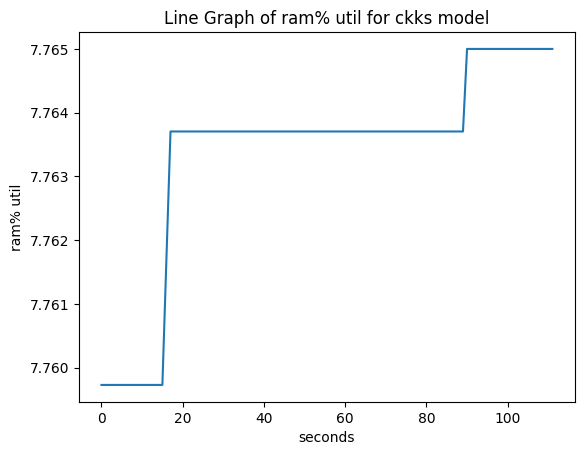

In [19]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [20]:
import numpy as np
np.mean(ram_usages_ckks)

7.763373126287578

Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

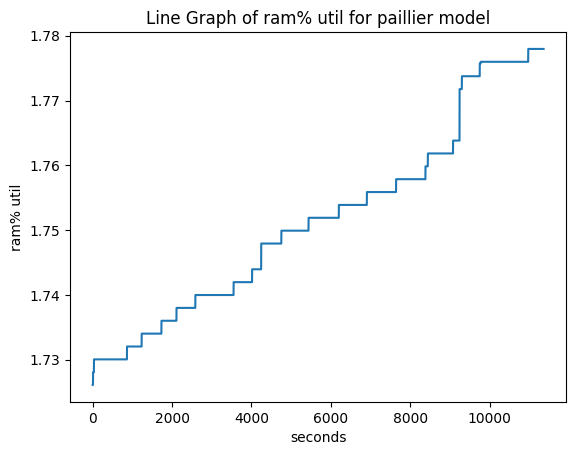

In [21]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [22]:
np.mean(ram_usages_paillier)

1.751804842202496

In [23]:
np.mean(ram_usages_sklearn)

1.60024558969366

In [24]:
train_time_ckks

99.08926558494568

In [25]:
train_time_paillier

12412.035054683685

In [26]:
testing_time_ckks

5.8292131423950195

In [27]:
testing_time_paillier

556.8425686359406

In [28]:
accuracy_ckks, accuracy_sklearn, accuracy_paillier

(0.7941176470588235, 0.788235294117647, 0.7941176470588235)